# Tourism and transport

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Tourist-Visitors Arrival and Expenditure.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Tourism arrivals series type,Tourism arrivals series type footnote,Value,Footnotes,Source,Unnamed: 9,Unnamed: 10
0,4,Afghanistan,2010,Tourism expenditure (millions of US dollars),NaN,NaN,147,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
1,4,Afghanistan,2017,Tourism expenditure (millions of US dollars),NaN,NaN,16,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
2,4,Afghanistan,2018,Tourism expenditure (millions of US dollars),NaN,NaN,50,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
3,4,Afghanistan,2019,Tourism expenditure (millions of US dollars),NaN,NaN,85,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
4,8,Albania,2010,Tourist/visitor arrivals (thousands),TF,NaN,2191,Excluding nationals residing abroad.,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2109,716,Zimbabwe,2018,Tourist/visitor arrivals (thousands),VF,NaN,2580,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
2110,716,Zimbabwe,1995,Tourism expenditure (millions of US dollars),NaN,NaN,145,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
2111,716,Zimbabwe,2005,Tourism expenditure (millions of US dollars),NaN,NaN,99,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
2112,716,Zimbabwe,2010,Tourism expenditure (millions of US dollars),NaN,NaN,135,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN


In [5]:
df.shape

(2114, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Region/Country/Area                    2114 non-null   int64  
 1   Unnamed: 1                             2114 non-null   object 
 2   Year                                   2114 non-null   int64  
 3   Series                                 2114 non-null   object 
 4   Tourism arrivals series type           1084 non-null   object 
 5   Tourism arrivals series type footnote  0 non-null      float64
 6   Value                                  2114 non-null   int64  
 7   Footnotes                              821 non-null    object 
 8   Source                                 2114 non-null   object 
 9   Unnamed: 9                             87 non-null     object 
 10  Unnamed: 10                            6 non-null      object 
dtypes: f

In [7]:
df.rename(
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Country/Area'}, inplace=True)

df.head()

,Code,Country/Area,Year,Series,Tourism arrivals series type,Tourism arrivals series type footnote,Value,Footnotes,Source,Unnamed: 9,Unnamed: 10
0,4,Afghanistan,2010,Tourism expenditure (millions of US dollars),NaN,NaN,147,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
1,4,Afghanistan,2017,Tourism expenditure (millions of US dollars),NaN,NaN,16,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
2,4,Afghanistan,2018,Tourism expenditure (millions of US dollars),NaN,NaN,50,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
3,4,Afghanistan,2019,Tourism expenditure (millions of US dollars),NaN,NaN,85,NaN,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN
4,8,Albania,2010,Tourist/visitor arrivals (thousands),TF,NaN,2191,Excluding nationals residing abroad.,"World Tourism Organization (UNWTO), Madrid, th...",NaN,NaN


In [8]:
df1 = df[['Code', 'Country/Area', 'Year', 'Series', 'Value']]
df1.head()

,Code,Country/Area,Year,Series,Value
0,4,Afghanistan,2010,Tourism expenditure (millions of US dollars),147
1,4,Afghanistan,2017,Tourism expenditure (millions of US dollars),16
2,4,Afghanistan,2018,Tourism expenditure (millions of US dollars),50
3,4,Afghanistan,2019,Tourism expenditure (millions of US dollars),85
4,8,Albania,2010,Tourist/visitor arrivals (thousands),2191


In [9]:
df1['Code'] = df1['Code'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Code          2114 non-null   category
 1   Country/Area  2114 non-null   object  
 2   Year          2114 non-null   int64   
 3   Series        2114 non-null   object  
 4   Value         2114 non-null   int64   
dtypes: category(1), int64(2), object(2)
memory usage: 80.1+ KB


In [10]:
df1.describe(include='object')

,Country/Area,Series
count,2114,2114
unique,220,2
top,Nepal,Tourist/visitor arrivals (thousands)
freq,12,1084


In [11]:
df1['Code'].value_counts()

144    12
710    12
422    12
132    12
410    12
       ..
478     2
795     2
728     2
430     1
226     1
Name: Code, Length: 220, dtype: int64

In [12]:
df1['Country/Area'].value_counts()

Nepal                12
Republic of Korea    12
Brazil               12
United Kingdom       12
Philippines          12
                     ..
Turkmenistan          2
South Sudan           2
Mauritania            2
Equatorial Guinea     1
Liberia               1
Name: Country/Area, Length: 220, dtype: int64

In [13]:
# replace wrongly encoded country or area names
df1['Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d’Ivoire",
    'Cura�ao': 'Curaçao',
    'R�union': 'Réunion'}, inplace=True
)

df1['Country/Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bonaire', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Dem. Rep. of the Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guin

In [14]:
df1['Year'].value_counts()

2010    401
2005    396
2017    382
2018    365
1995    342
2019    228
Name: Year, dtype: int64

In [15]:
df1['Series'].value_counts()

Tourist/visitor arrivals (thousands)            1084
Tourism expenditure (millions of US dollars)    1030
Name: Series, dtype: int64

In [16]:
df1['Value'].describe()

count      2114.000000
mean       5997.287606
std       15152.505525
min           1.000000
25%         205.000000
50%         937.500000
75%        4968.250000
max      237726.000000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

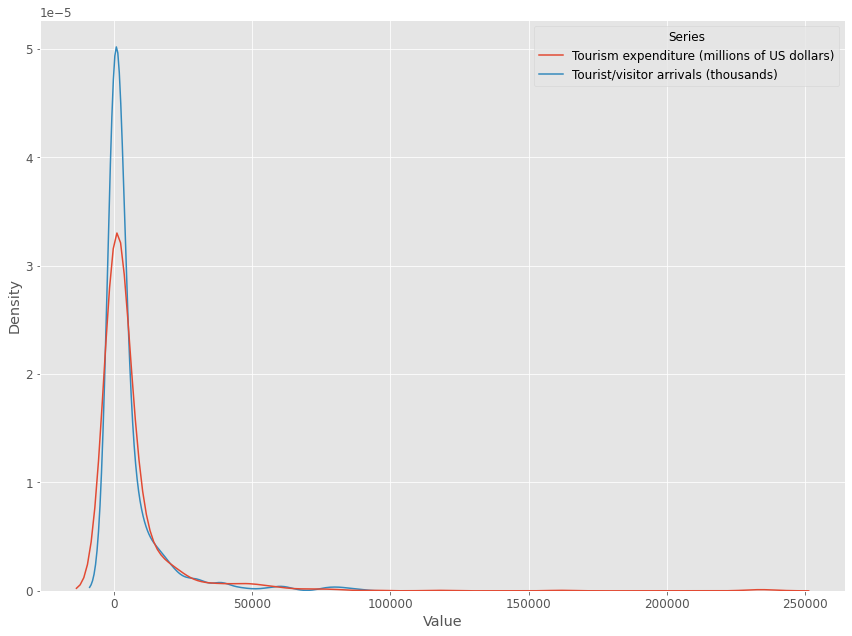

In [17]:
sns.kdeplot(data=df1, x='Value', hue='Series')

# Missing Values Exploration

In [18]:
df1.isna().sum()

Code            0
Country/Area    0
Year            0
Series          0
Value           0
dtype: int64

# Grouping and Aggregation

In [19]:
df1_grpd = df1.groupby(['Country/Area', 'Series'])
df1_grpd.head()

,Code,Country/Area,Year,Series,Value
0,4,Afghanistan,2010,Tourism expenditure (millions of US dollars),147
1,4,Afghanistan,2017,Tourism expenditure (millions of US dollars),16
2,4,Afghanistan,2018,Tourism expenditure (millions of US dollars),50
3,4,Afghanistan,2019,Tourism expenditure (millions of US dollars),85
4,8,Albania,2010,Tourist/visitor arrivals (thousands),2191
...,...,...,...,...,...
2109,716,Zimbabwe,2018,Tourist/visitor arrivals (thousands),2580
2110,716,Zimbabwe,1995,Tourism expenditure (millions of US dollars),145
2111,716,Zimbabwe,2005,Tourism expenditure (millions of US dollars),99
2112,716,Zimbabwe,2010,Tourism expenditure (millions of US dollars),135


# Data Visualization

In [20]:
from matplotlib.ticker import FuncFormatter

# y-axis formatter functions
def million(x, pos):
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


# bar plot helper function
def plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        data=data, 
        x=x, y=y, 
        ci=None, hue=hue,
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_bar

# Tourism expenditure exploration

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

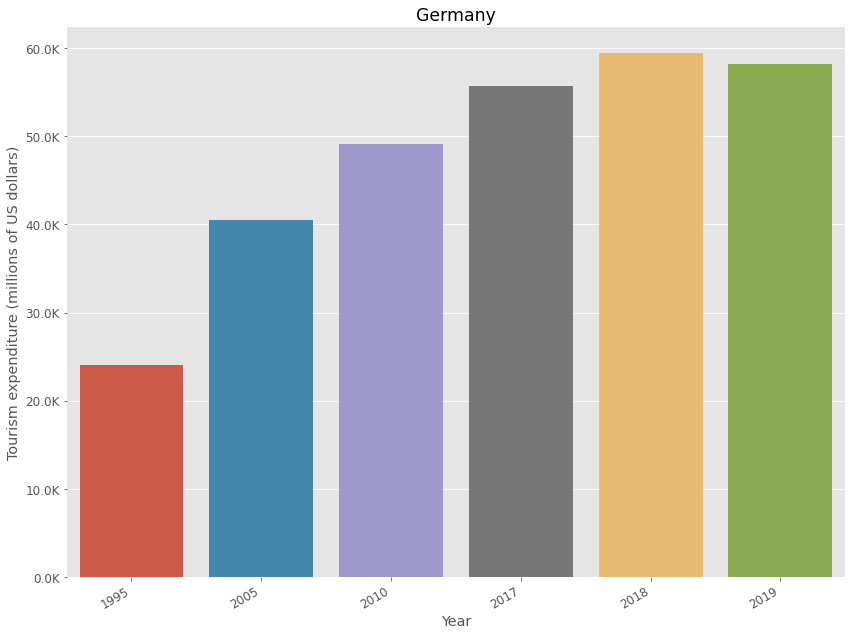

In [21]:
plot_bar(
    data=df1_grpd.get_group(('Germany', 'Tourism expenditure (millions of US dollars)')),
    x='Year', y='Value',
    title='Germany', xlabel='Year', ylabel='Tourism expenditure (millions of US dollars)',
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

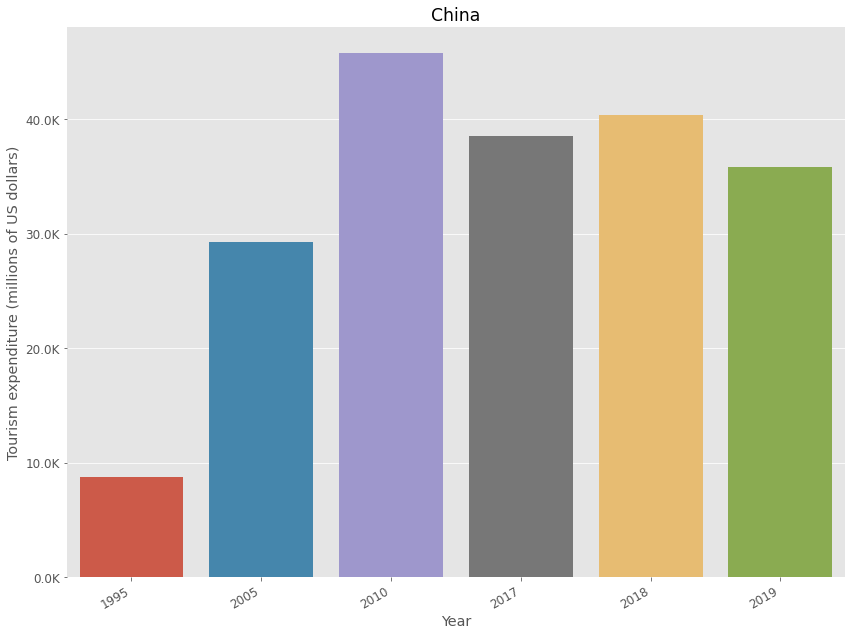

In [22]:
plot_bar(
    data=df1_grpd.get_group(('China', 'Tourism expenditure (millions of US dollars)')),
    x='Year', y='Value',
    title='China', xlabel='Year', ylabel='Tourism expenditure (millions of US dollars)',
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

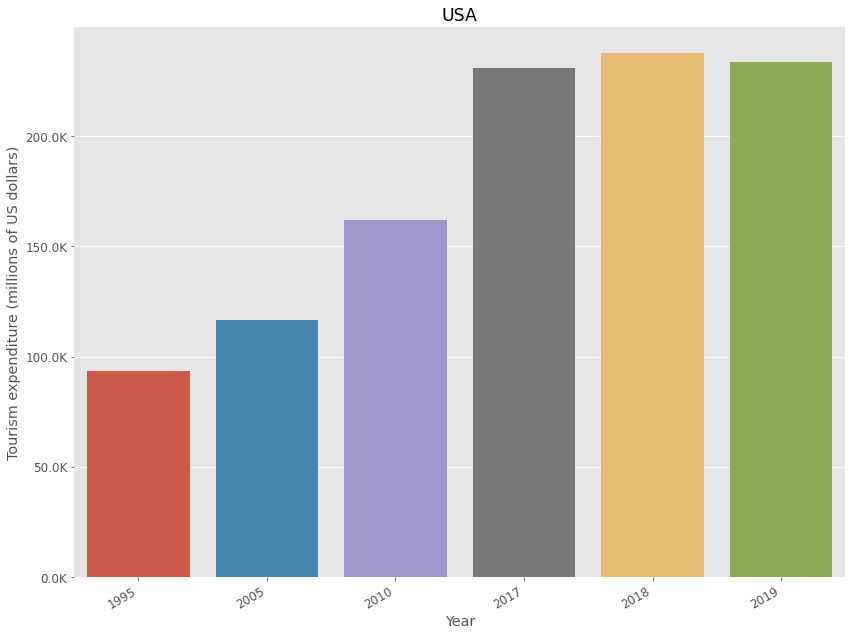

In [23]:
plot_bar(
    data=df1_grpd.get_group(('United States of America', 'Tourism expenditure (millions of US dollars)')),
    x='Year', y='Value',
    title='USA', xlabel='Year', ylabel='Tourism expenditure (millions of US dollars)',
    formatter=format_tsd
)

# Tourist/visitor arrivals exploration

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

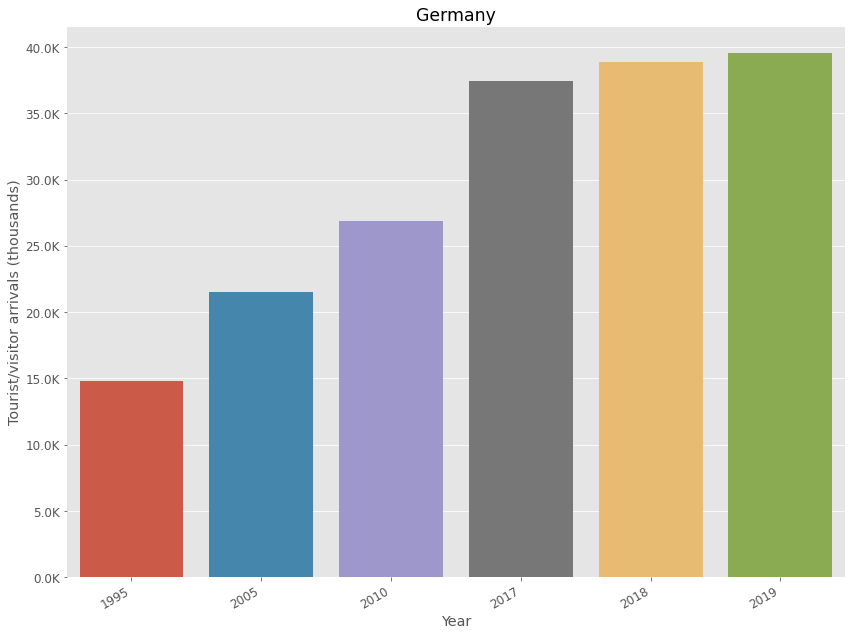

In [24]:
plot_bar(
    data=df1_grpd.get_group(('Germany', 'Tourist/visitor arrivals (thousands)')),
    x='Year', y='Value',
    title='Germany', xlabel='Year', ylabel='Tourist/visitor arrivals (thousands)',
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

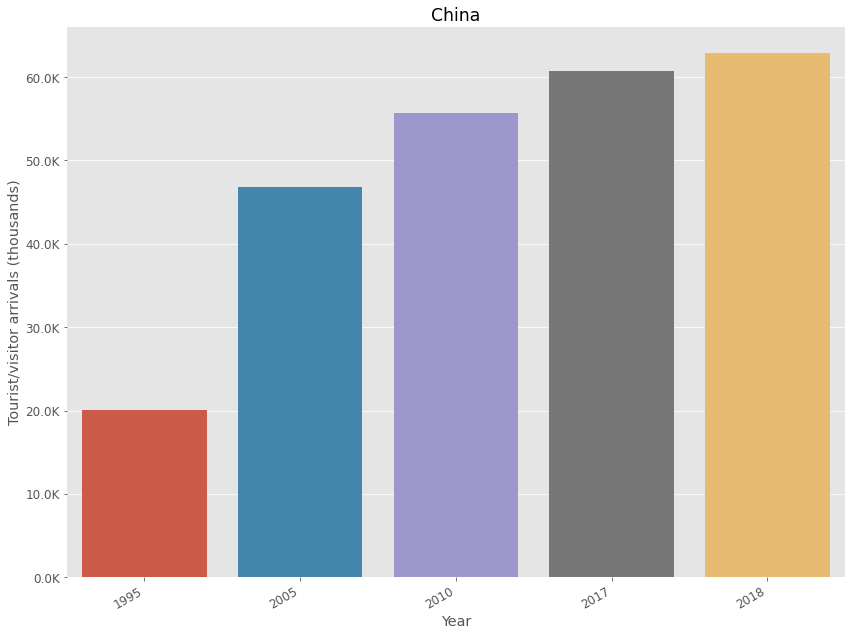

In [25]:
plot_bar(
    data=df1_grpd.get_group(('China', 'Tourist/visitor arrivals (thousands)')),
    x='Year', y='Value',
    title='China', xlabel='Year', ylabel='Tourist/visitor arrivals (thousands)',
    formatter=format_tsd
)

<function __main__.plot_bar(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, formatter=None)>

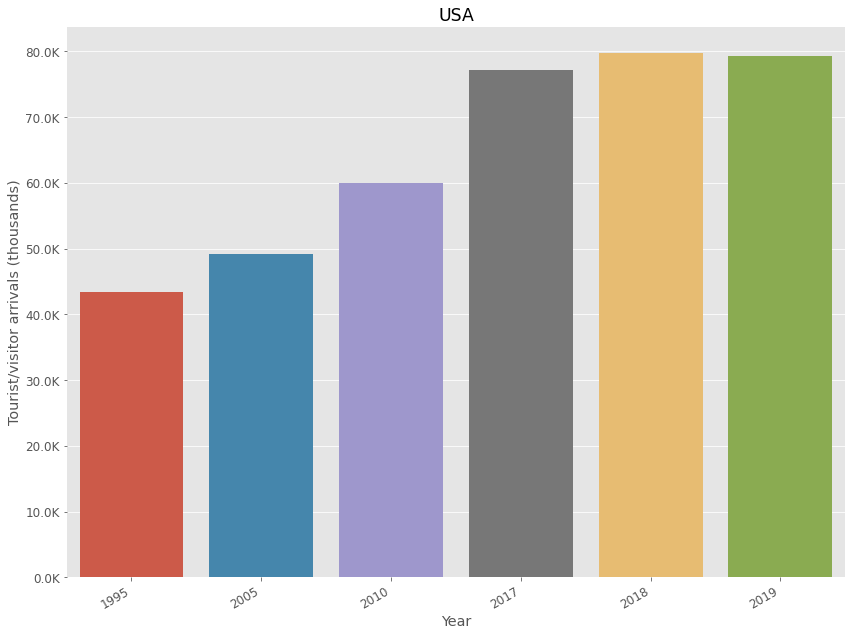

In [26]:
plot_bar(
    data=df1_grpd.get_group(('United States of America', 'Tourist/visitor arrivals (thousands)')),
    x='Year', y='Value',
    title='USA', xlabel='Year', ylabel='Tourist/visitor arrivals (thousands)',
    formatter=format_tsd
)